In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

/tmp/ipykernel_5306/3915802764.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
total_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


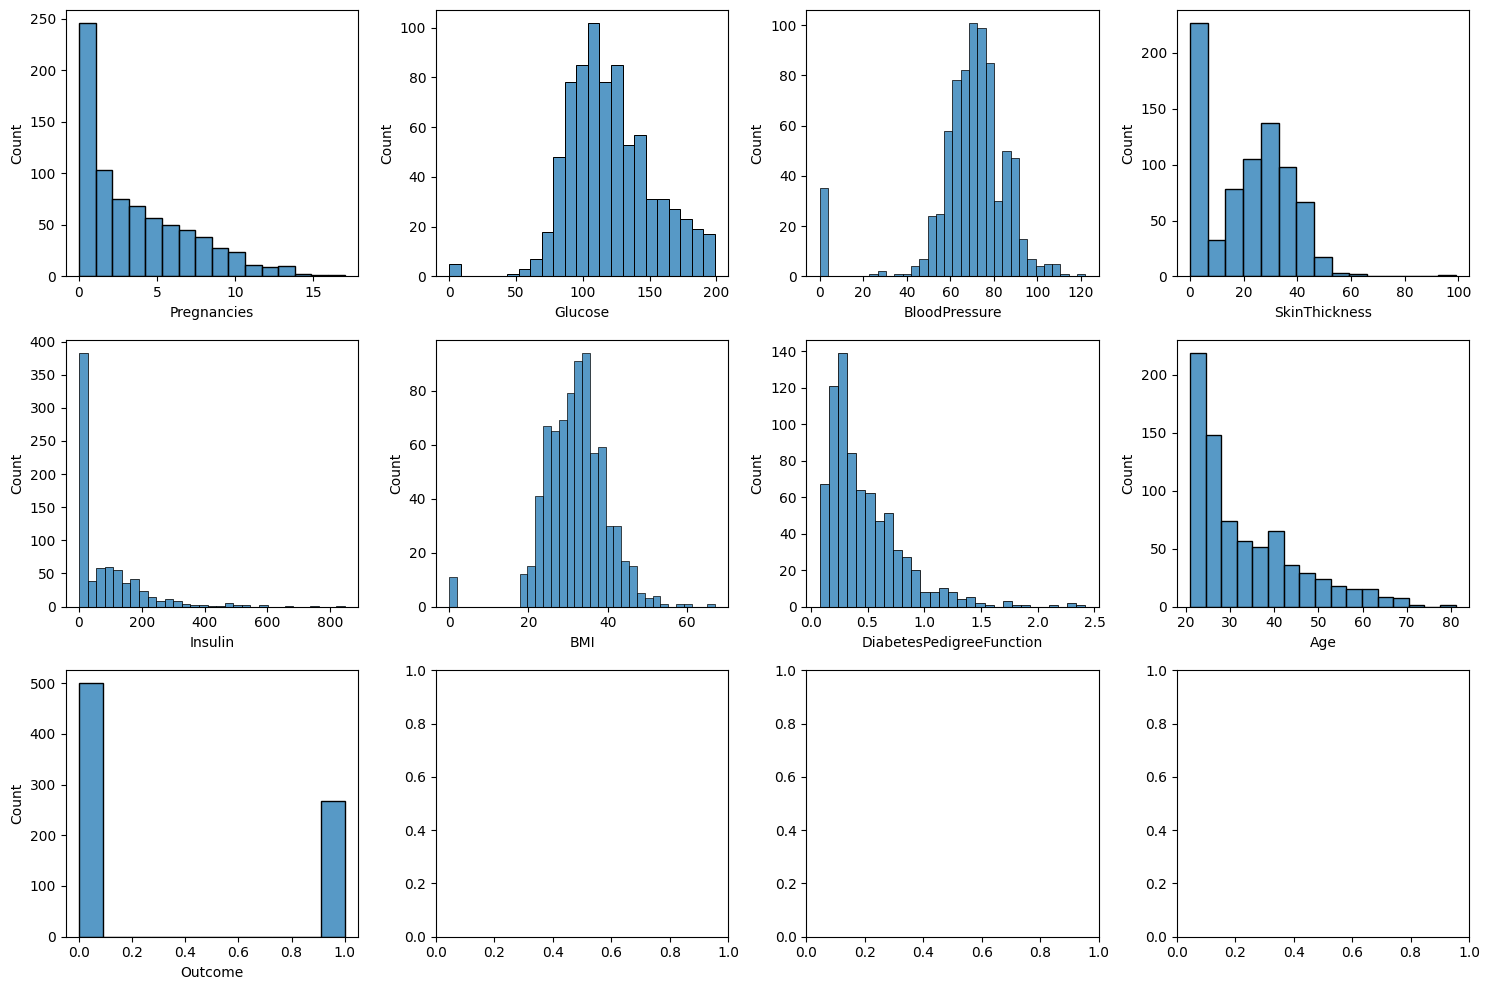

In [5]:
#Analysis on categorical variables

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 4, figsize=(15, 10))


sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=total_data, x="Glucose")
sns.histplot(ax=axis[0, 2], data=total_data, x="BloodPressure")
sns.histplot(ax=axis[0, 3], data=total_data, x="SkinThickness")
sns.histplot(ax=axis[1, 0], data=total_data, x="Insulin")
sns.histplot(ax=axis[1, 1], data=total_data, x="BMI")
sns.histplot(ax=axis[1, 2], data=total_data, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[1, 3], data=total_data, x="Age")
sns.histplot(ax=axis[2, 0], data=total_data, x="Outcome") 


plt.tight_layout()


plt.show()

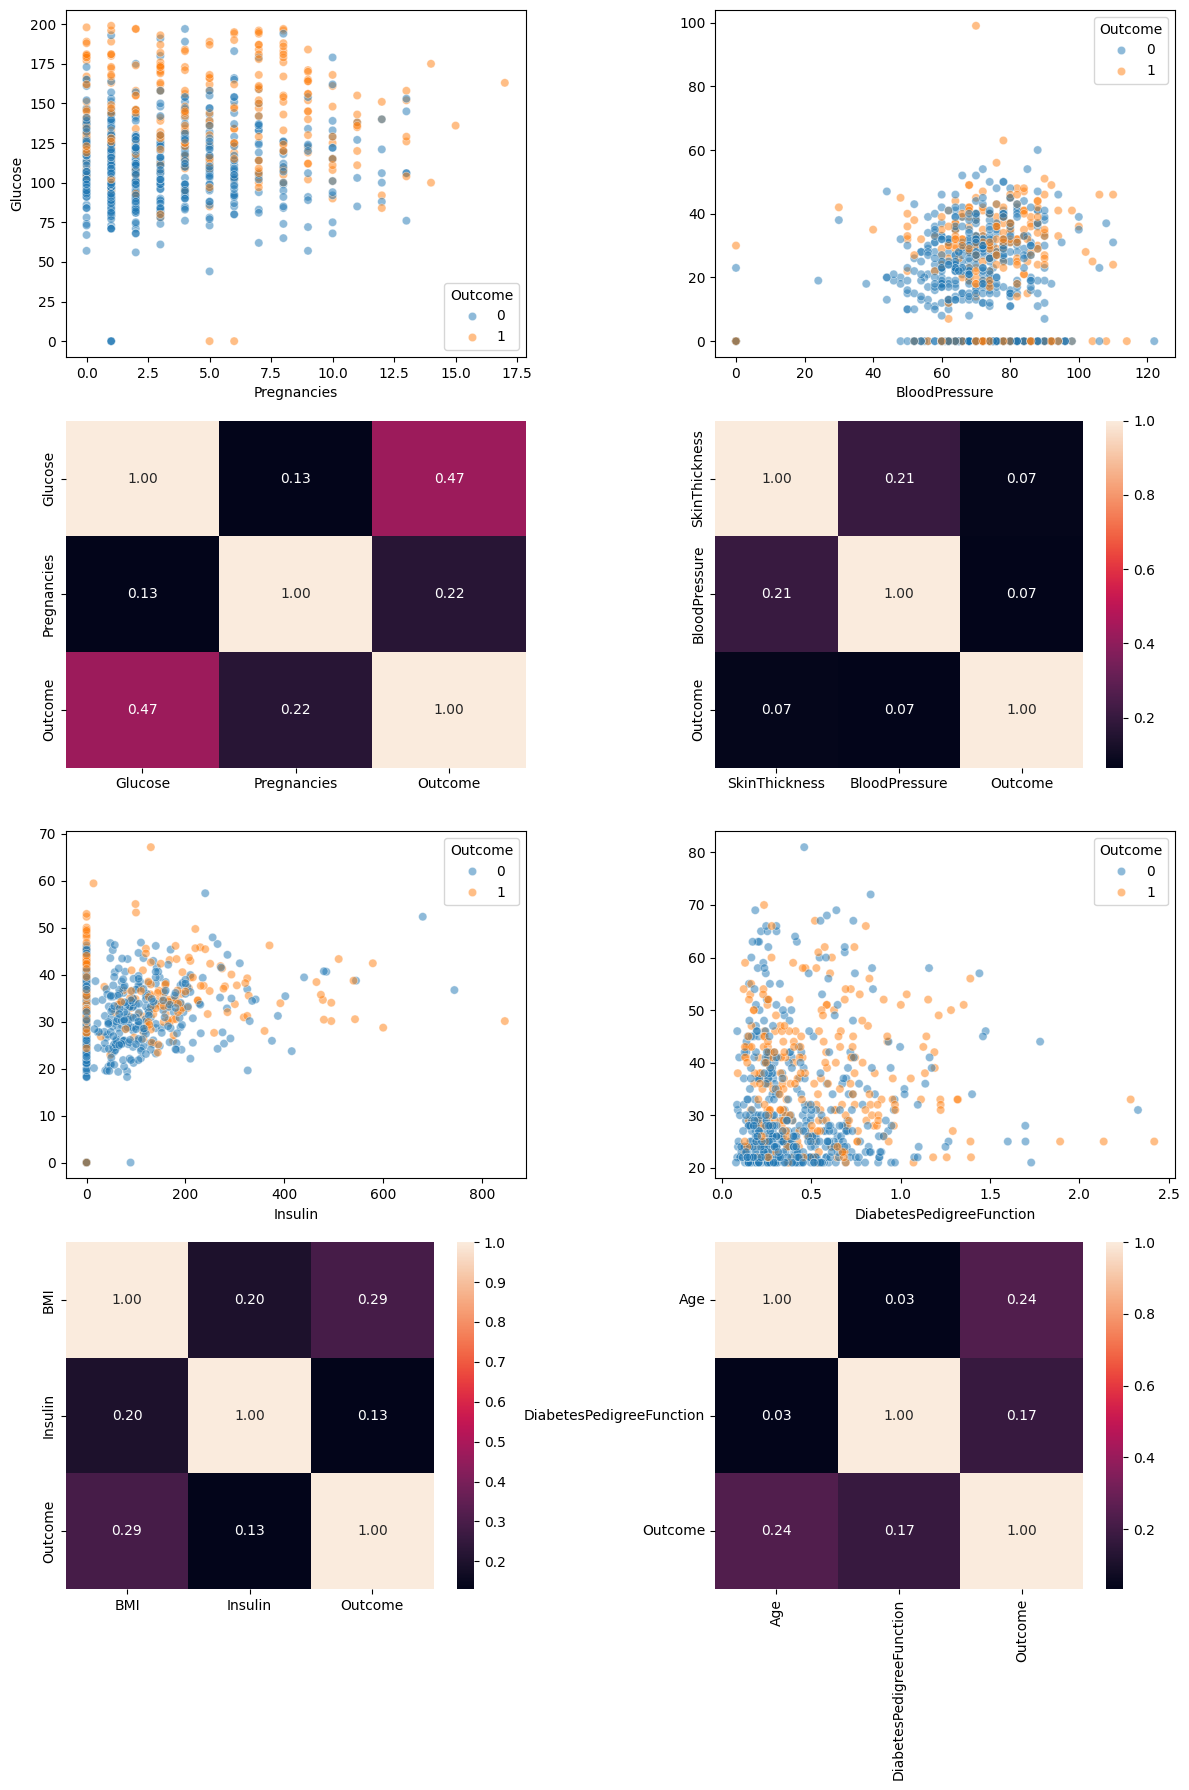

In [6]:
# Numerical - Numerical Analysis


fig, axis = plt.subplots(4, 2, figsize=(12, 18))


sns.scatterplot(ax=axis[0, 0], data=total_data, x="Pregnancies", y="Glucose", hue="Outcome", alpha=0.5)
sns.heatmap(total_data[["Glucose", "Pregnancies", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.scatterplot(ax=axis[0, 1], data=total_data, x="BloodPressure", y="SkinThickness", hue="Outcome", alpha=0.5).set(ylabel=None)
sns.heatmap(total_data[["SkinThickness", "BloodPressure", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.scatterplot(ax=axis[2, 0], data=total_data, x="Insulin", y="BMI", hue="Outcome", alpha=0.5).set(ylabel=None)
sns.heatmap(total_data[["BMI", "Insulin", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0]).set(ylabel=None)

sns.scatterplot(ax=axis[2, 1], data=total_data, x="DiabetesPedigreeFunction", y="Age", hue="Outcome", alpha=0.5).set(ylabel=None)
sns.heatmap(total_data[["Age", "DiabetesPedigreeFunction", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1]).set(ylabel=None)

plt.tight_layout()

plt.show()

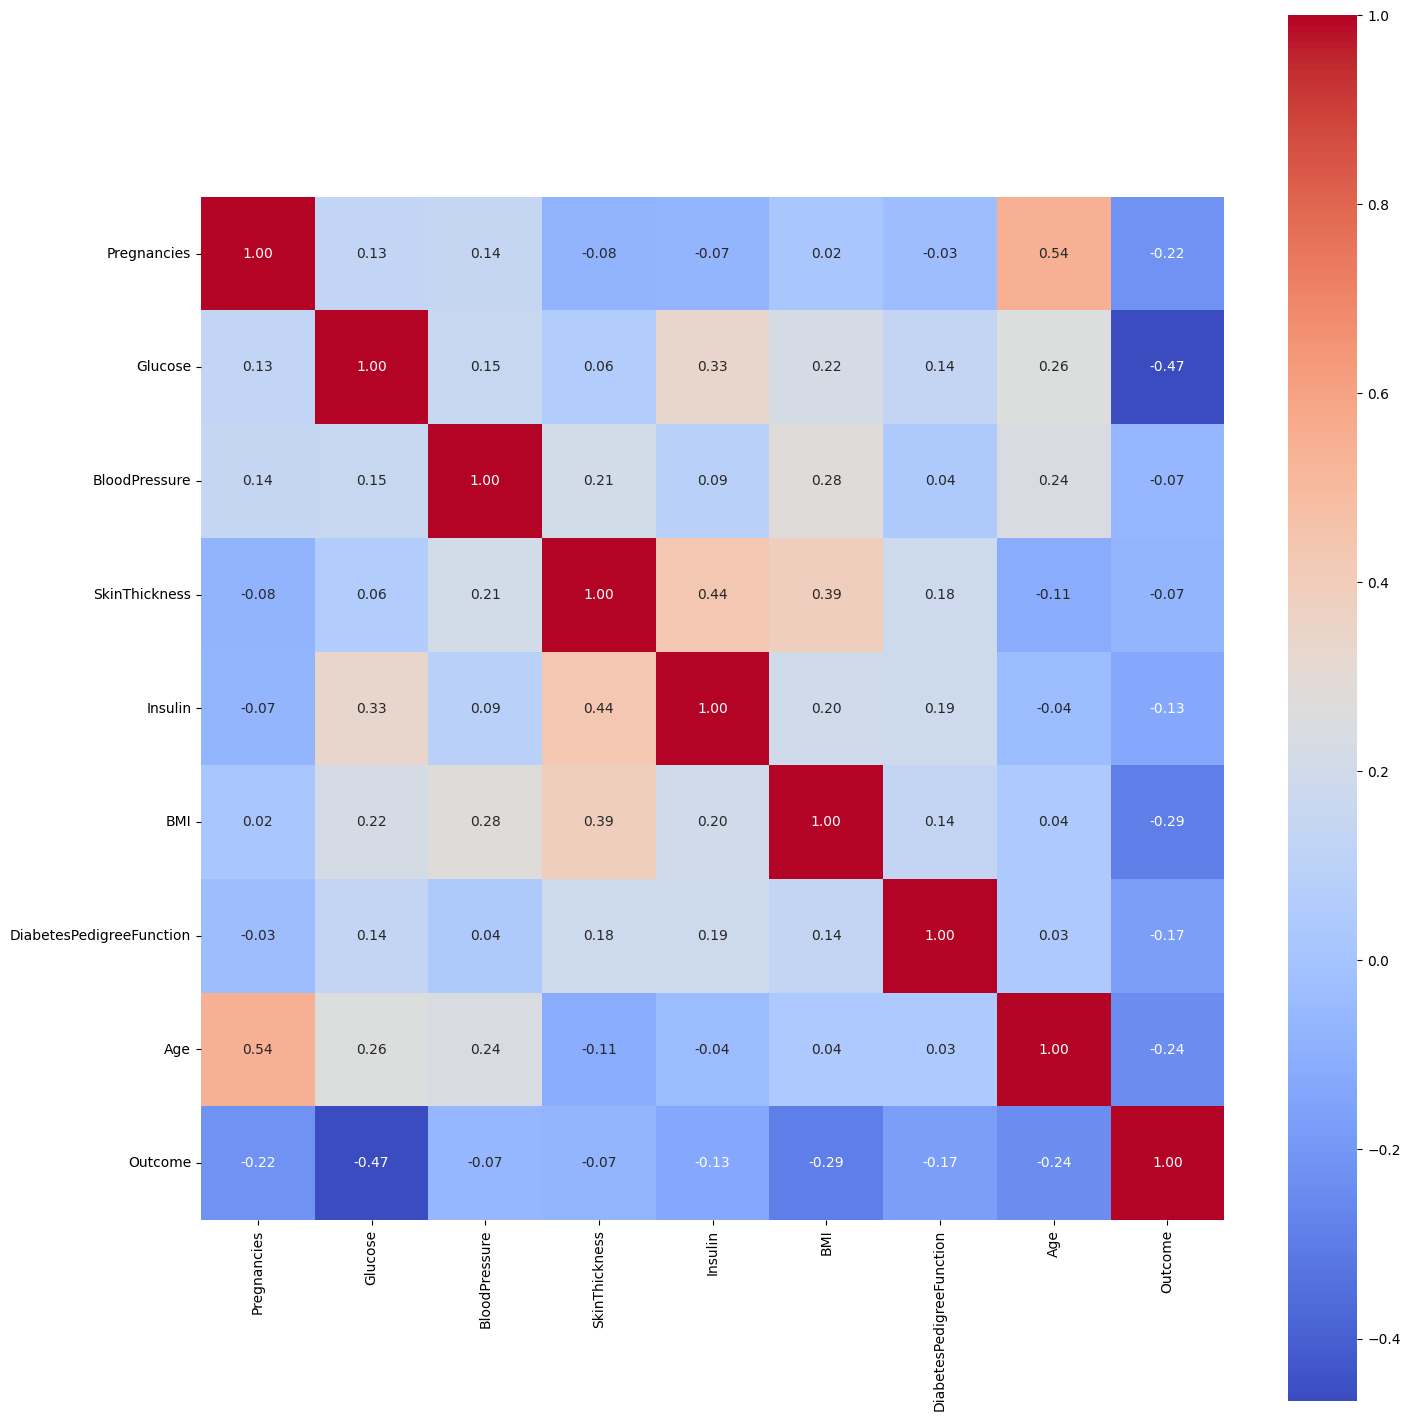

In [7]:
# Numerical-categorical analysis (complete)

total_data["Outcome"] = pd.factorize(total_data["Outcome"])[0]


fig, axes = plt.subplots(figsize=(15, 15))


correlation_matrix = total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                                 "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr()


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)


plt.tight_layout()


plt.show()

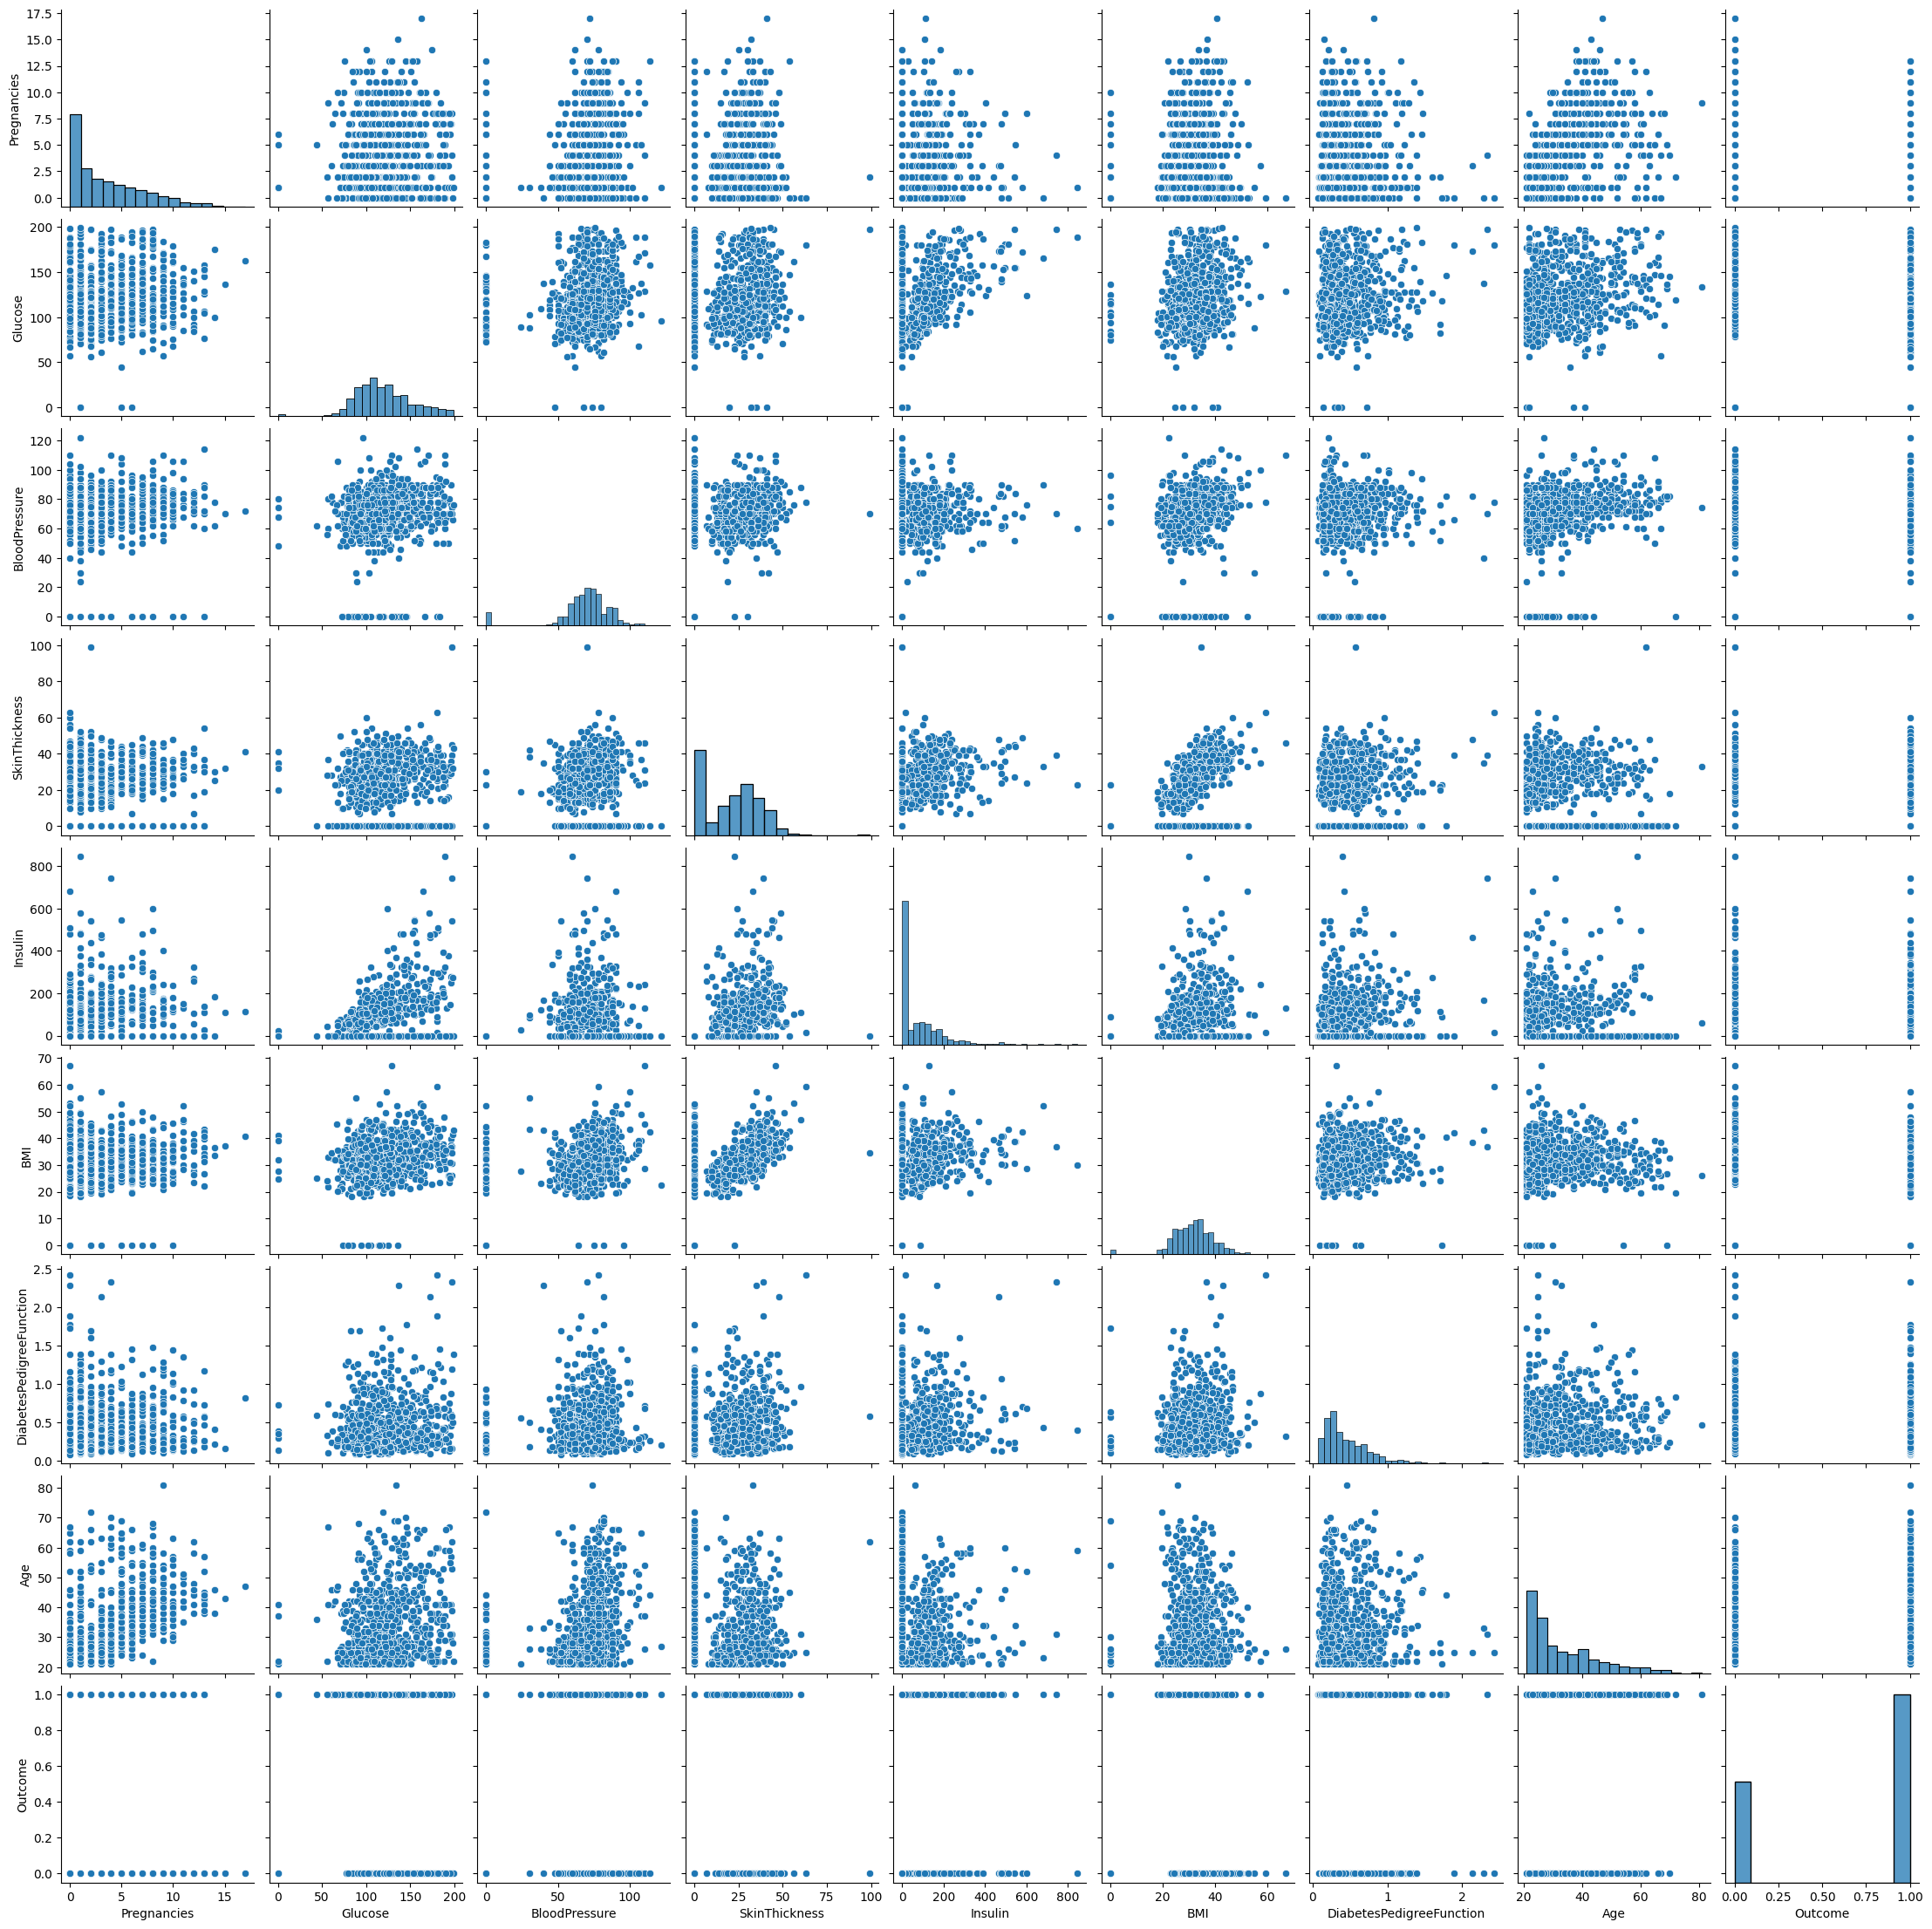

In [8]:
# Analysing all the Data at Once
sns.pairplot(data = total_data)

In [9]:
#Outlier analysis

total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.651042
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


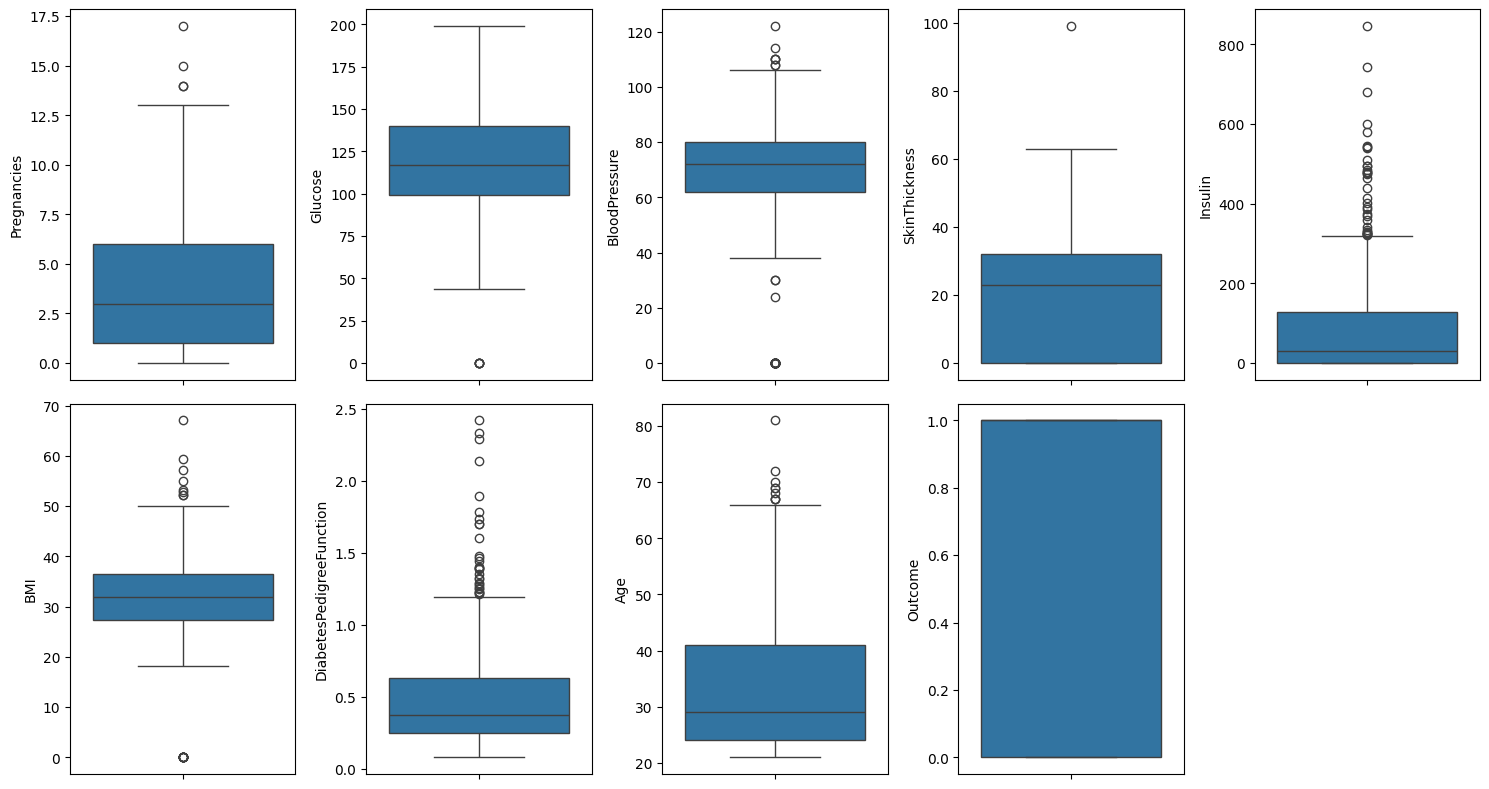

In [10]:

import warnings

# Desactivar todas las advertencias de DeprecationWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Factorize the Outcome Data

fig, axes = plt.subplots(2, 5, figsize=(15, 8))

sns.boxplot(ax=axes[0, 0], data=total_data, y="Pregnancies")
sns.boxplot(ax=axes[0, 1], data=total_data, y="Glucose")
sns.boxplot(ax=axes[0, 2], data=total_data, y="BloodPressure")
sns.boxplot(ax=axes[0, 3], data=total_data, y="SkinThickness")
sns.boxplot(ax=axes[0, 4], data=total_data, y="Insulin")
sns.boxplot(ax=axes[1, 0], data=total_data, y="BMI")
sns.boxplot(ax=axes[1, 1], data=total_data, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axes[1, 2], data=total_data, y="Age")
sns.boxplot(ax=axes[1, 3], data=total_data, y="Outcome")

fig.delaxes(axes[1, 4])

plt.tight_layout()


plt.show()

In [11]:
# Missing value analysis
total_data.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# No hace falta que escalemos los datos ni los factoricemos , directamente hacemos el guardado de train y test .
# Nuestra variable objetivo es Outcome.

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [13]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [14]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [15]:
# Boosting model
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,1
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,1
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,1
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,0


In [25]:
# Paso 1. Lectura del conjunto de datos procesado

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [16]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [22]:
# Paso 2: Inicialización y entrenamiento del model

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 200, learning_rate = 0.001, random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [23]:
# Paso 3: Predicción del modelo
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [26]:
from pickle import dump

dump(model, open("../models/boosting_classifier_nestimators-20_learnrate-0.001_42.sav", "wb"))

In [27]:
# Boosting para regresión

import pandas as pd

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,1
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,1
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,1
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,0


In [28]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [29]:
# Paso 2: Inicialización y entrenamiento del modelo
from xgboost import XGBRegressor

model = XGBRegressor(random_state = 42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
y_pred = model.predict(X_test)
y_pred

array([ 3.89527649e-01,  6.92547679e-01,  1.11656976e+00,  7.00288177e-01,
        6.84286356e-01,  9.01235044e-02,  8.44460964e-01, -7.07553234e-03,
        7.32661426e-01,  2.78768122e-01,  8.36413085e-01, -4.64351438e-02,
        5.42940497e-01,  2.98227340e-01,  9.97072220e-01,  4.13987845e-01,
        1.05590296e+00,  1.10167551e+00,  4.19352144e-01,  4.07212853e-01,
        5.68528295e-01,  9.10833538e-01,  7.75979221e-01,  1.00862324e+00,
        4.24668700e-01,  1.13034574e-02,  1.04743695e+00,  9.65925872e-01,
        6.57648563e-01,  9.90979671e-01,  4.45619747e-02, -9.92732588e-03,
        3.59994829e-01,  9.95429466e-04, -5.06051891e-02,  4.71676648e-01,
       -1.83052182e-01,  4.97440010e-01,  6.92354918e-01,  1.62375078e-01,
        9.95232224e-01,  8.49475324e-01,  5.84952645e-02,  7.70606637e-01,
        1.02763474e+00,  6.72142208e-02,  3.61557394e-01,  9.06291306e-01,
        8.65748167e-01,  1.94383152e-02,  1.02346694e+00,  1.30968988e-01,
       -2.19164342e-02,  

In [31]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 0.2115181319537835


In [34]:
from pickle import dump

dump(model, open("../models/boosting_regressor_nestimators-20_learnrate-0.001_42.sav", "wb"))


In [51]:
# Información_y_gráficas_Boosting otra forma de hacerlo 
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Ejemplo de datos de entrenamiento
# Reemplaza esto con tus propios datos
X_train = train_data.drop(["Outcome"], axis=1)
y_train = train_data["Outcome"]


# Configuración del modelo XGBoost
params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}

# Lista para almacenar los errores a medida que aumenta n_estimators
errors = []

# Lista para almacenar las gráficas
figures = []

# Bucle para entrenar el modelo con diferentes n_estimators
for n in range(1, 11):  # Prueba con 10 estimadores, puedes ajustar esto según tus necesidades
    model = xgb.XGBRegressor(n_estimators=n, **params)
    model.fit(X_train, y_train)

    # Calcular el error (RMSE)
    predictions = model.predict(X_train)
    rmse = ((predictions - y_train) ** 2).mean() ** 0.5
    errors.append(rmse)

# Guardar las gráficas de los árboles de decisión
for i in range(5):  # Cambia este rango según el número de estimadores que desees visualizar
    fig, ax = plt.subplots(figsize=(80, 60))
    xgb.plot_tree(model, num_trees=i, ax=ax)
    plt.savefig(f'tree_{i}.png')
    plt.close(fig)

# Mostrar el progreso del error
print("RMSE a medida que aumenta n_estimators:")
for n, error in enumerate(errors, 1):
    print(f"n_estimators={n}: RMSE={error:.4f}")

RMSE a medida que aumenta n_estimators:
n_estimators=1: RMSE=0.4009
n_estimators=2: RMSE=0.3517
n_estimators=3: RMSE=0.3220
n_estimators=4: RMSE=0.2954
n_estimators=5: RMSE=0.2613
n_estimators=6: RMSE=0.2422
n_estimators=7: RMSE=0.2199
n_estimators=8: RMSE=0.2094
n_estimators=9: RMSE=0.1945
n_estimators=10: RMSE=0.1837


<Figure size 1000x1000 with 0 Axes>

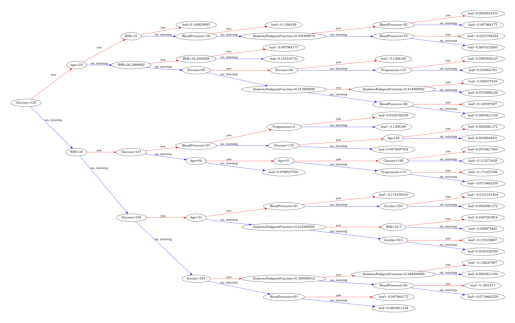

<Figure size 1000x1000 with 0 Axes>

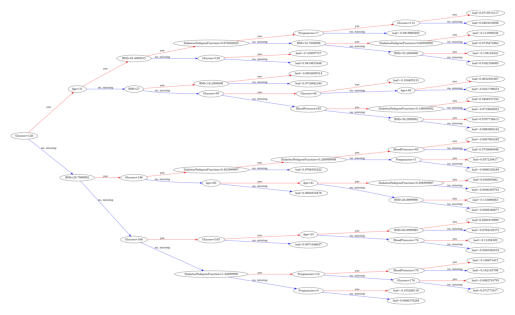

<Figure size 1000x1000 with 0 Axes>

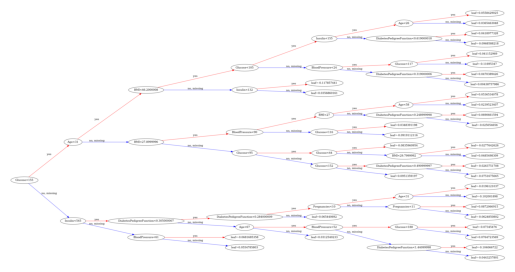

<Figure size 1000x1000 with 0 Axes>

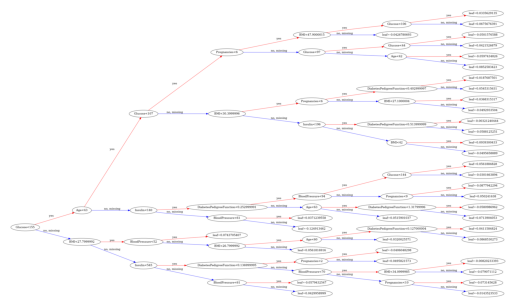

<Figure size 1000x1000 with 0 Axes>

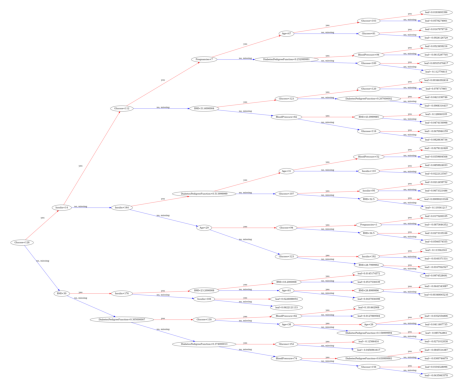

<Figure size 1000x1000 with 0 Axes>

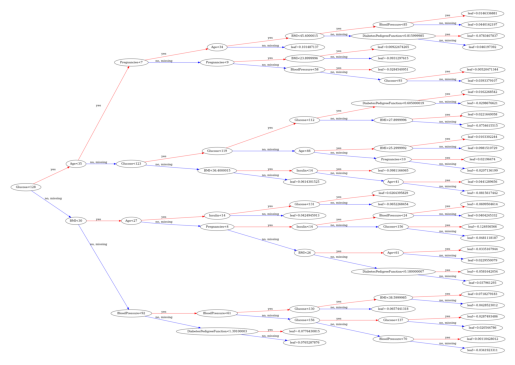

<Figure size 1000x1000 with 0 Axes>

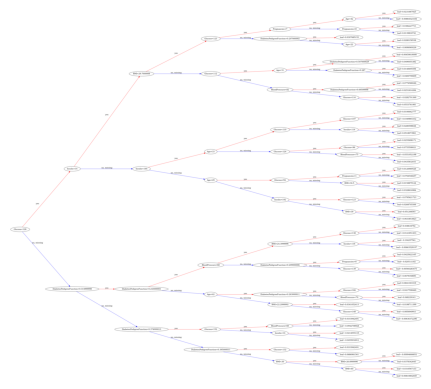

<Figure size 1000x1000 with 0 Axes>

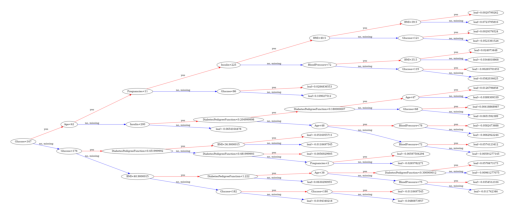

<Figure size 1000x1000 with 0 Axes>

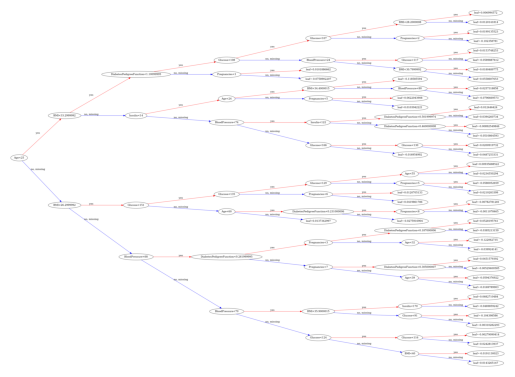

<Figure size 1000x1000 with 0 Axes>

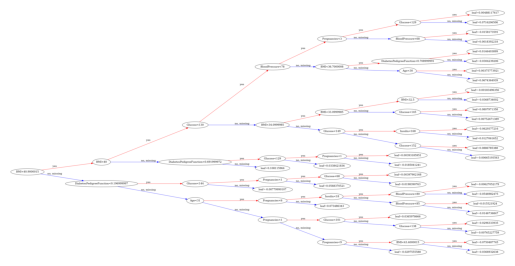

In [49]:
# Información_y_gráficas_Boosting otra forma de hacerlo 

import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Ejemplo de datos de entrenamiento
# Reemplaza esto con tus propios datos
X_train = train_data.drop(["Outcome"], axis=1)
y_train = train_data["Outcome"]

# Configuración del modelo XGBoost
params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}

# Entrenar el modelo XGBoost
num_estimators = 10  # Puedes ajustar esto según tus necesidades
model = xgb.XGBRegressor(n_estimators=num_estimators, **params)
model.fit(X_train, y_train)

    # Mostrar los árboles de decisión con un tamaño de figura más grande
for i in range(num_estimators):
    plt.figure(figsize=(10, 10))  # Ajusta el tamaño según tus preferencias
    plot_tree(model, num_trees=i, rankdir='LR')  # Puedes ajustar 'rankdir' según tus preferencias
    plt.show()

Random Forest:

Accuracy Score: 0.77
Random Forest ha demostrado un rendimiento sólido en la clasificación de datos. Su capacidad para construir múltiples árboles y combinar sus predicciones parece ser efectiva en el conjunto de datos.


Decision Tree:

Accuracy Score: 0.73
El Decision Tree ha mostrado un rendimiento ligeramente inferior en comparación con Random Forest. Es posible que, al depender de un solo árbol de decisión, no pueda capturar la complejidad de los datos de manera tan efectiva como Random Forest.


Boosting:

Accuracy Score: 1.0
El algoritmo de boosting ha logrado un accuracy score perfecto de 1.0, lo cual es bastante impresionante. Sin embargo, hay que tener cuidado con este resultado, ya que un score perfecto podría indicar sobreajuste (overfitting) a los datos de entrenamiento. Comentar que tambien tiene un MSE de 0.2115181 el cual sugiere un buen ajuste del modelo a los datos de entrenamiento.

Que significa OVERFITTING o Sobreajuste:

El modelo se vuelve demasiado específico para los datos de entrenamiento y puede perder su capacidad de generalización a nuevos datos no vistos.

Los modelos sobreajustados suelen tener un rendimiento excelente en el conjunto de datos de entrenamiento, pero su rendimiento se degrada significativamente cuando se aplican a datos que no formaron parte del entrenamiento. Esto se debe a que el modelo ha memorizado los detalles específicos de los datos de entrenamiento en lugar de aprender los patrones subyacentes que se aplicarían de manera más general a nuevos conjuntos de datos.

Para evitar el overfitting, se pueden utilizar diversas técnicas, como:

- División de Datos: Separar el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo en datos no vistos.

- Validación Cruzada: Utilizar técnicas de validación cruzada para evaluar el modelo en múltiples particiones de los datos, lo que ayuda a obtener una estimación más robusta del rendimiento.

- Regularización: Aplicar técnicas de regularización, como la penalización de términos de complejidad en modelos, para evitar que se vuelvan demasiado complejos y se ajusten demasiado a los datos de entrenamiento.

- Uso de Conjuntos Más Grandes de Datos: Proporcionar al modelo más datos para entrenamiento, lo que puede ayudar a capturar patrones más generales y reducir el riesgo de sobreajuste.

Simplificación del Modelo: Utilizar modelos menos complejos o limitar la complejidad de los modelos, por ejemplo, ajustando la profundidad máxima de un árbol de decisión.

El overfitting es un desafío común en el aprendizaje automático, y encontrar el equilibrio adecuado entre el ajuste y la generalización es esencial para desarrollar modelos que sean útiles en la práctica.